#**Data analysis Colombia Imports Exports**
-----------------------
##This notebook analyzes the Colombian economic situation using import and export data.

-----------------------
#####**objetive**

Apply concepts of probability distributions to model certain aspects Colombia critial indicators. For example, modeling the distribution and analyzing the financial context of the country through import and export indicators

#####**DataSets**

- ODEB - Observatorio de Desarrollo Económico - importaciones
    https://observatorio.desarrolloeconomico.gov.co/temas/exportaciones/bases    
- ODEB - Observatorio de Desarrollo Económico - exportaciones
    https://observatorio.desarrolloeconomico.gov.co/temas/importaciones/bases
#####**Importing necessary libraries**

In [47]:
#libraries
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [48]:
#variables
Imports_route = 'Files/bd_importaciones2024_agosto.xlsx'
Imports_sheet_name='BD Importaciones'
Imports_header=16
Exports_route ='Files/bd_exportaciones_agosto2024.xlsx'
Exports_sheet_name='BD Exportaciones'
Exports_header=17

color_map = {'Import': 'blue', 'Export': 'red', 'NA': 'green'}
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

In [49]:
#to_delete : information
ruta_absoluta = os.path.abspath(Imports_route)
print(ruta_absoluta)

c:\Users\ALEXANDER\Documents\Especializacion\Tratamiento_y_analitica_datos\Tarea1\Codigo\Analitica_datos\Files\bd_importaciones2024_agosto.xlsx


In [50]:
# Reading imports file Excel
df_imports = pd.read_excel(Imports_route,sheet_name=Imports_sheet_name, header=Imports_header)
df_imports.columns = df_imports.columns.str.strip()

print("List of fields and data types:")
print(df_imports.dtypes)

List of fields and data types:
Periodo                          int64
Mes                              int64
Codigo departamento destino      int64
Departamento destino            object
Codigo pais origen               int64
Pais de origen                  object
Codigo partida                   int64
Nombre partida                  object
Codigo ciiu rev4                 int64
Descripcion ciiu rev4           object
Codigo capitulo                  int64
Nombre capitulo                 object
Nivel tecnologico               object
Codigo uso economico             int64
Uso economico                   object
Detalle uso economico           object
Dolares CIF                    float64
Dolares FOB                    float64
Kilogramos netos               float64
Cantidad                       float64
dtype: object


In [51]:
# Reading Exports file Excel
df_exports = pd.read_excel(Exports_route,sheet_name=Exports_sheet_name, header=Exports_header)
df_exports.columns = df_exports.columns.str.strip()
print("List of fields and data types:")
print(df_exports.dtypes)

List of fields and data types:
Periodo                         int64
Mes                             int64
Codigo departamento origen      int64
Departamento origen            object
Codigo pais destino             int64
Pais destino                   object
Codigo partida                  int64
Nombre partida                 object
Codigo ciiu rev4               object
Descripcion ciiu rev4          object
Codigo capitulo                 int64
Nombre capitulo                object
Nivel tecnologico              object
Codigo unidad                  object
unidad                         object
Dolares FOB                   float64
Kilogramos netos              float64
Cantidad                      float64
dtype: object


In [52]:
# New column to identify joining data 
df_exports['Type'] = 'Export'
df_imports['Type'] = 'Import'

In [53]:
# Working with the top 15 exports
top_departamentos_export = (
    df_exports.groupby('Departamento origen')['Kilogramos netos']
    .sum()
    .nlargest(15)
    .reset_index()
)

# Working with the top 15 imports
top_departamentos_import = (
    df_imports.groupby('Departamento destino')['Kilogramos netos']
    .sum()
    .nlargest(15)
    .reset_index()
)

# subplots: one graph for exports y another one for Imports
fig_import_export = make_subplots(rows=1, cols=2, subplot_titles=("Exportaciones", "Importaciones"))

# Creating Graph Exports
fig_import_export.add_trace(
    go.Bar(
        x=top_departamentos_export['Departamento origen'],
        y=top_departamentos_export['Kilogramos netos'],
        name="Exportaciones",
        marker_color='blue'
    ),
    row=1, col=1
)

#Graph Properties
fig_import_export.add_trace(
    go.Bar(
        x=top_departamentos_import['Departamento destino'],
        y=top_departamentos_import['Kilogramos netos'],
        name="Importaciones",
        marker_color='green'
    ),
    row=1, col=2
)

# Names
fig_import_export.update_layout(
    title="Top 15 Departamentos en Colombia por Volumen de Exportaciones e Importaciones",
    xaxis_title="Departamento",
    yaxis_title="Volumen en Kilogramos"
)

#Show graph
fig_import_export.show()
fig_import_export.write_html('graphics/fig_import_export.html')


In [54]:
# Working with sub_dataframes_selecting data

df_sub_exports = df_exports.loc[:,['Periodo','Mes','Departamento origen','Pais destino','Nivel tecnologico','Dolares FOB','Kilogramos netos','Cantidad','Type']]

# preparing columns to join
df_sub_exports = df_sub_exports.rename(columns={
    'Departamento origen': 'Departamento',
    'Pais destino': 'Pais'
})

print(df_sub_exports.dtypes)


Periodo                int64
Mes                    int64
Departamento          object
Pais                  object
Nivel tecnologico     object
Dolares FOB          float64
Kilogramos netos     float64
Cantidad             float64
Type                  object
dtype: object


In [55]:
df_sub_imports = df_imports.loc[:,['Periodo','Mes','Departamento destino','Pais de origen','Nivel tecnologico','Dolares FOB','Kilogramos netos','Cantidad','Type']]

# preparing columns to join
df_sub_imports = df_sub_imports.rename(columns={
    'Departamento destino': 'Departamento',
    'Pais de origen': 'Pais'
})

#Join dataframes
df_imports_exports = pd.concat([df_sub_exports, df_sub_imports])

C:\Users\ALEXANDER\AppData\Local\Temp\ipykernel_4628\2305896181.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



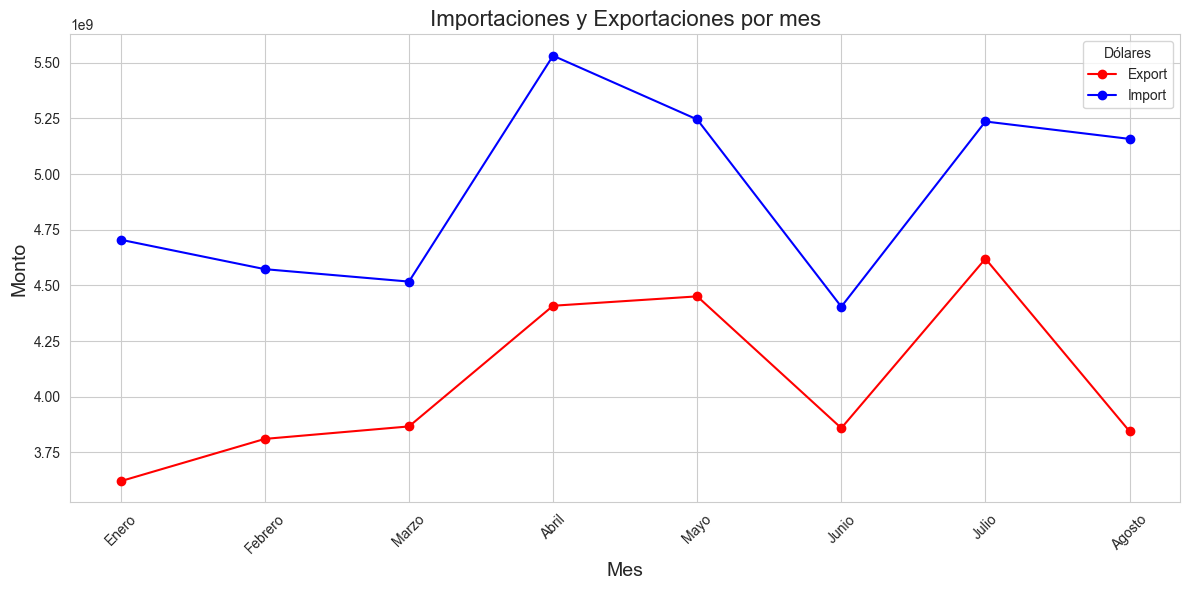

In [56]:
#Creating a replacement for month number
df_imports_exports['Mes_nombre'] = df_imports_exports['Mes'].apply(lambda x: meses[x - 1])
df_imports_exports['Mes_nombre'] = pd.Categorical(df_imports_exports['Mes_nombre'], categories=meses, ordered=True)

# Group and sum
grupo = df_imports_exports.groupby(['Mes_nombre', 'Type'])['Dolares FOB'].sum().reset_index()
grupo = grupo[grupo['Dolares FOB'] > 0]

tabla_pivot = grupo.pivot(index='Mes_nombre', columns='Type', values='Dolares FOB').fillna(0)
types = tabla_pivot.columns.tolist()

# Graph
plt.figure(figsize=(12, 6))

for type_import_export in types:
    plt.plot(tabla_pivot.index, tabla_pivot[type_import_export], label=type_import_export, color=color_map.get(type_import_export, 'gray'), marker='o')

# Graph properties
plt.title('Importaciones y Exportaciones por mes', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Monto', fontsize=14)
plt.legend(title='Dólares')
plt.xticks(rotation=45)

# Show
plt.tight_layout()
plt.show()

In [57]:
# Group by country and transaction type
top_countries = (
    df_imports_exports.groupby(['Pais', 'Type'])['Kilogramos netos']
    .sum()
    .reset_index()
)

# top 20 counrties
top_20_countries = (
    top_countries.groupby('Pais')['Kilogramos netos']
    .sum()
    .nlargest(20)
    .index
)
top_countries = top_countries[top_countries['Pais'].isin(top_20_countries)]
top_countries = top_countries.sort_values(by='Kilogramos netos', ascending=False)

# Graph
fig_comparative = px.bar(top_countries, 
             x='Pais', 
             y='Kilogramos netos', 
             color='Type', 
             title="Top 20 Países para Exportaciones e Importaciones en Colombia",
             labels={'Kilogramos netos': 'Volumen (Kilogramos)', 'Pais': 'País'}
            )

# Properties
fig_comparative.update_layout(xaxis_title="País", yaxis_title="Volumen en Kilogramos")
fig_comparative.show()
fig_comparative.write_html('graphics/fig_comparative.html')
